(3 pts) What is a neural network? What are the general steps required to build a neural network?              
(3 pts) Generally, how do you check the performance of a neural network? Why is this the case?               
(4 pts) Clean the data or do additional cleaning if you have used the dataset for another assignment. Specify the improvements (at least 2) that you made to your cleaning if you selected the dataset before. If you select one with a low number or records, consider oversampling.                    
(10 pts) Create a neural network using Keras or PyTorch to predict the outcome of your datasets.           
(5 pts) Compare the performance of the neural networks to another model you created. Which performed better? Why do you think that is?                       

# What is a neural network

A neural network is a way to diagram relationships between data in a way that is mapped like the human brain. The general steps are :
1) obtain and preprocess the data
2) Set the paramaters of the network
3) Train the network by feeding it the data
4) Fine tune as needed

# How to check performance and why? 

You can check its performance by doing a classification matrix and calculating the recall, precision, accuracy, and any other optimization metric. This is the case because it allows us to see how well the machine is able to predict the trends by putting what it predicts against what the actual value is. 

# Cleaning the Data - credit card set

In [75]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
card_df = pd.read_csv('Credit_card.csv')
label_df = pd.read_csv('Credit_card_label.csv')

credit_df = pd.merge(card_df,label_df)

credit_df = pd.get_dummies(credit_df)

credit_df.fillna(credit_df.mean(), inplace=True)






In [76]:
from sklearn.model_selection import train_test_split

X = credit_df.drop('label', axis=1).values
y = credit_df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=32,
                                                    stratify=y)


from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=32)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

model = LogisticRegression(random_state=32)
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)






/Users/aarushichoudhary/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [77]:
import torch.optim as optim


In [78]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)  # Reshape to (batch_size, 1)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)  # Reshape to (batch_size, 1)

class Adamk(nn.Module):
    def __init__(self, input_size):
        super(Adam, self).__init__()
        self.fc1 = nn.Linear(input_size, 10)
        self.fc2 = nn.Linear(10, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

# Instantiate the model
input_size = X_train_scaled.shape[1]
model = Adam(input_size)

# Define the loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters())

# Train the model
epochs = 10
batch_size = 32
for epoch in range(epochs):
    for i in range(0, len(X_train_tensor), batch_size):
        inputs = X_train_tensor[i:i+batch_size]
        targets = y_train_tensor[i:i+batch_size]

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}], Loss: {loss.item()}')



NameError: name 'Adam' is not defined

In [ ]:
with torch.no_grad():
    outputs = model(X_test_tensor)
    y_pred = (outputs >= 0.5).float().squeeze().numpy() 



/Users/aarushichoudhary/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/aarushichoudhary/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/aarushichoudhary/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       280
           1       0.00      0.00      0.00        30

    accuracy                           0.90       310
   macro avg       0.45      0.50      0.47       310
weighted avg       0.82      0.90      0.86       310



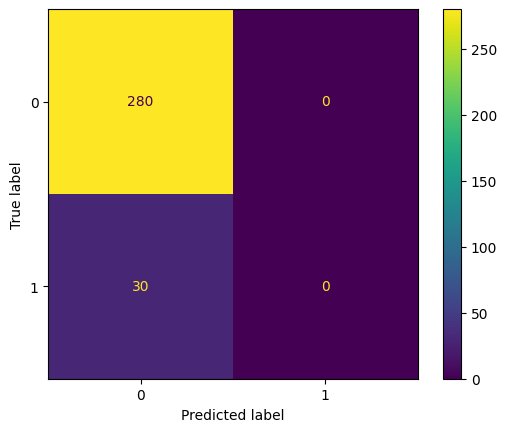

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

# Other Model - Logistic Regression


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



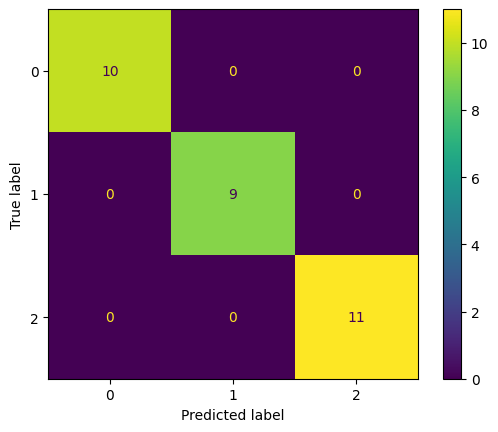

In [83]:
regression_model = LogisticRegression()
regression_model.fit(X_train, y_train)
y_pred = regression_model.predict(X_test)

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)


The results from the neural network and the logistic regression are the same.